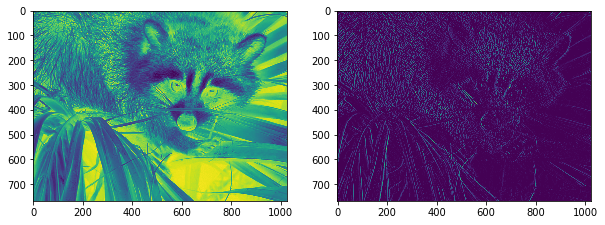

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage # scikit_image
import scipy.misc
# 흑백 0~255
img = 255 - sp.misc.face(gray=True).astype(float) # 이미지, 동영상 # sp.misc(기타 모아놓은거).face(gray=True) 흑백, 반전
# edge detection filter - 경계선 검출
k = np.zeros((2,2)) 
# 0 0
# 0 0
k[:,0] = 1
# 1 0
# 1 0
k[:,1] = -1
# 1 -1
# 1 -1

# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

C:\Users\ICT01_13\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_13\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_13\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_13\Anaconda3\envs\tf_test\lib\site-packages

2 427 640 3


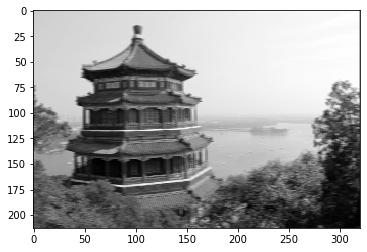

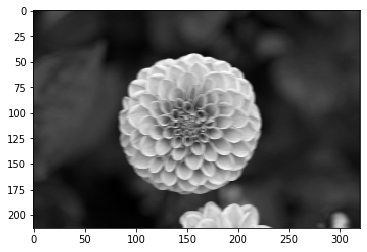

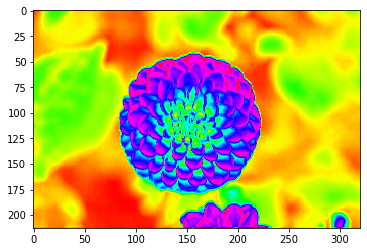

(2, 213, 320, 2)


In [3]:
from sklearn.datasets import load_sample_image
import tensorflow as tf
# 1, height, weight, channels  # 차수 일치
china = load_sample_image('china.jpg') # 자동 4차원 0~1, 0~255
# 이미지 정규화 (각 값들을 255로 나눠줌)
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype = np.float32)
# 장수, 높이, 넓이, 컬러수 => 컬러는 숫자
batch_size, height, width, channels = dataset.shape
print(batch_size, height, width, channels) # 2 427(행) 640(열) 3(RGB)
                                           #    높이  가로 
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
# 0 0 0 0 0 0 0     
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0   x 2

filters[:, 3, :, 0] = 1
# 0 0 0 1 0 0 0     
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
filters[3, :, :, 1] = 1
# 0 0 0 0 0 0 0     
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 1 1 1 1 1 1 1
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0

# 주입변수   
X = tf.placeholder(tf.float32, shape = (None, height, width, channels)) # 2, 427, 640, 3 (컬러) => 단색
# 이미지 포맷 결정
# VALID : 421 x 643, 7, 7
# 스트라이드 427 213.5=>214
convolution = tf.nn.conv2d(X, filters, strides = [1, 1, 1, 1], padding = "SAME") # X, (7, 7, 2), strides, padding
# convolution = tf.nn.conv2d(X,filters,strides=[2,2], padding="SAME") # (2, 214, 320, 2)
#convolution = tf.nn.conv2d(X,filters,strides=[1,1,1,1], padding="VALID") # (2, 421, 634, 2)

# pooling할때는 stride랑 사이즈 같아야함
# 사이즈 감소
max_pool = tf.nn.max_pool(convolution, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "VALID") # 2x2, 
# 여기까지 Graph 정의 (node + edge)

with tf.Session() as sess :
#    output = sess.run(convolution, feed_dict = {X : dataset})
    output = sess.run(max_pool, feed_dict = {X : dataset})

plt.imshow(output[0, :, :, 1], cmap = "gray")
plt.show()
plt.imshow(output[1, :, :, 1], cmap = "gray")
plt.show()
plt.imshow(output[1, :, :, 0], cmap = "hsv")
plt.show()
type(output)
print(output.shape) # 2, 427, 640, 2(필터가 2개)

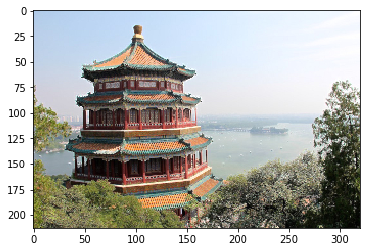

In [3]:
# max pooling 된 결과를 이미지 출력하시요.
# conv2d : 채널을 1개로 생성
# pooling은 채널을 그대로 남김 - 컬러 출력
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "VALID") 
with tf.Session() as sess :
    output = sess.run(max_pool, feed_dict = {X : dataset})

plt.imshow(output[0].astype(np.uint8)) # unsigned int 형(양수만 존재)
plt.show()

In [4]:
def plot_image(image) : 
    plt.imshow(image, cmap = "gray", interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
def plot_color_image(image) :
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")
    plt.show()

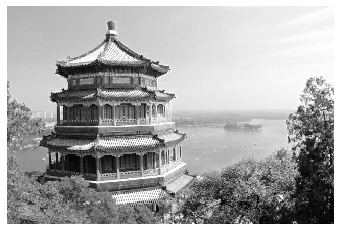

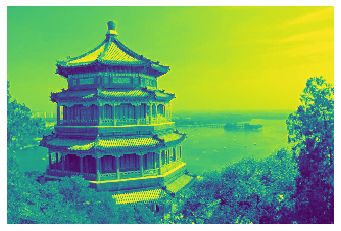

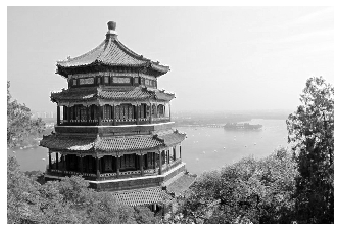

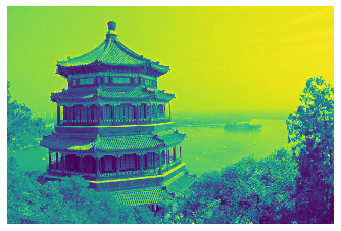

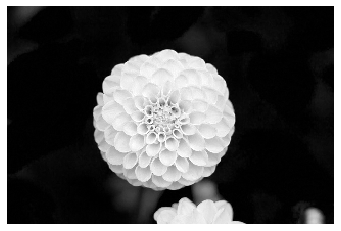

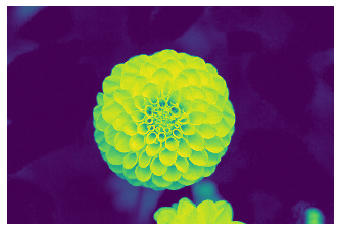

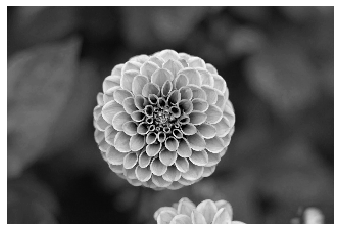

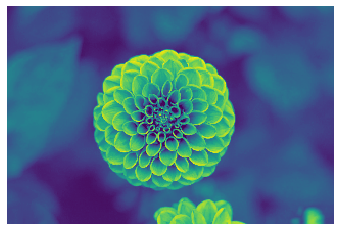

In [5]:
for image_index in (0,1) :
    for feature_map_index in (0,1) :
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()
        plot_color_image(output[image_index, :, :, feature_map_index])
        plt.show()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


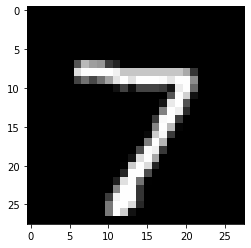

In [19]:
%matplotlib inline
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
first_image = mnist.test.images[0]
pixels = first_image.reshape((28, 28)) # 784
plt.imshow(pixels, cmap = "gray")
plt.show()

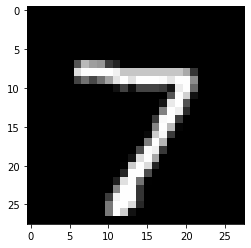

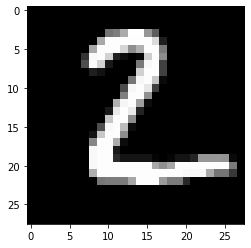

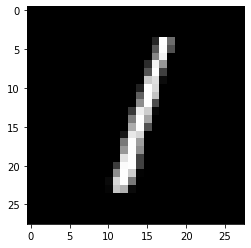

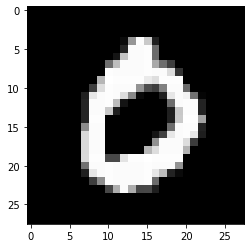

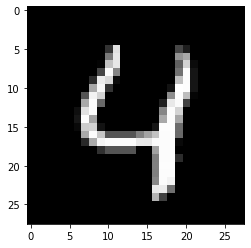

In [7]:
first_image = mnist.test.images[0:5]
first_image = np.array(first_image, dtype = 'float')
for i in range(5) :
    pixels = first_image[i].reshape((28, 28))
    plt.imshow(pixels, cmap = "gray")
    plt.show()   

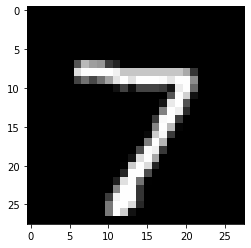

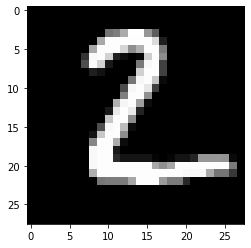

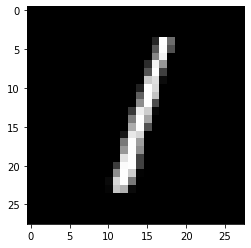

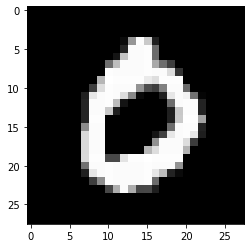

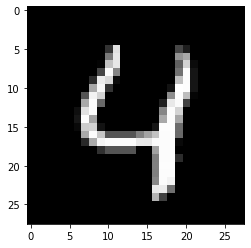

In [10]:
# 5장의 이미지 출력
for i in range(0,5) :
    a = mnist.test.images[i]
    pixels = a.reshape((28, 28))
    plt.imshow(pixels, cmap = "gray")
    plt.show()

In [4]:
learning_rate = 0.001 # optimizer 사용
num_steps = 500       # epoch
batch_size = 128      # mini batch_size
display_step = 10     # 시각화
# 변수 784
num_input = 784       # 이미지 28x28 => fully-connected (한 줄)
num_classes = 10      # one-hot-encoding
dropout = 0.75        # 과적합을 방지하기 위해서 임의적으로 25%를 계산 안함
                      # 컴퓨터가 랜덤으로 dropout시킴
# 위치를 찾기위해서 이름을 달아준다.
X = tf.placeholder(tf.float32, [None, num_input], name='input')# 훈련 128x784
Y = tf.placeholder(tf.float32, [None, num_classes], name='output')# 종속변수 128x10
keep_prob = tf.placeholder(tf.float32, name='keep')

In [5]:
# 1번 이상 반복되면 함수화
# activation function 마지막에 한번 호출 : 회귀냐 분류를 결정
# multi-layer : xor문제해결은 activation 함수를 이용해서 비선형
# cnn => deep 할 수록 결과가 좋음
def conv2d(X, W, b, strides = 1) :
    # 가중치 : filter
    X = tf.nn.conv2d(X, W, strides = [1, strides, strides, 1], padding = 'SAME')
    X = tf.nn.bias_add(X, b)
    return tf.nn.relu(X)  # relu를 쓰는 이유 : 비선형 mapping

def maxpool2d(X, k=2) :
    return tf.nn.max_pool(X, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME') # max, avg

In [6]:
# 128(batch_size) x 784(num_input)
def conv_net(X, weights, biases, dropout) : # 128x784 =>28x28
    X = tf.reshape(X, shape = [-1, 28, 28, 1]) # 원래 이미지 형태 # 128x28x28x1 - 필터가 32장
    conv1 = conv2d(X, weights['wc1'], biases['bc1']) # 128x28x28x32
    conv1 = maxpool2d(conv1, k = 2) # 128x14x14x32 (특징은 줄어들지 않음)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # 128x14x14x64
    conv2 = maxpool2d(conv2, k = 2) # 128x7x7x64
    
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) # 7*7*64, 1024 # fully-connected
    # 128x7*7*64, 1024 =>(가중치 계산) => 128x1024
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # 25%
    # 128x1024, 1024x10 => 128x10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [7]:
weights = {
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1' : tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out' : tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([num_classes])),
}

In [8]:
logits = conv_net(X, weights, biases, keep_prob) # 128x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'accuracy')
tf.add_to_collection('accuracy', accuracy)
tf.add_to_collection('Xi', X)
tf.add_to_collection('Yi', Y)

init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
# with tf.Session() as sess:
#     sess.run(init)
#     for step in range(1, num_steps+1) :
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         sess.run(train_op, feed_dict={X: batch_x, Y:batch_y, keep_prob : dropout})
#         if step % display_step == 0 or step ==1 :
#             loss, acc = sess.run([loss_op, accuracy], feed_dict = {X : batch_x, Y : batch_y, keep_prob : 1.0})
#             print('Step' + str(step) + 'Minibatch Loss=' + "{:.4f}".format(loss) + ", Training Accuracy = " + "{:.3f}".format(acc))
#     print("Testing Accuracy : ", sess.run(accuracy, feed_dict = {X:mnist.test.images[:256],
#                                                                 Y:mnist.test.labels[:256], keep_prob:1.0}))

Step1Minibatch Loss=49385.1289, Training Accuracy = 0.164
Step10Minibatch Loss=17412.8750, Training Accuracy = 0.352
Step20Minibatch Loss=11529.4414, Training Accuracy = 0.547
Step30Minibatch Loss=6842.3281, Training Accuracy = 0.703
Step40Minibatch Loss=2557.0879, Training Accuracy = 0.828
Step50Minibatch Loss=2822.1958, Training Accuracy = 0.867
Step60Minibatch Loss=4129.8604, Training Accuracy = 0.812
Step70Minibatch Loss=2353.5889, Training Accuracy = 0.844
Step80Minibatch Loss=2157.2966, Training Accuracy = 0.852
Step90Minibatch Loss=1612.7329, Training Accuracy = 0.906
Step100Minibatch Loss=2415.4712, Training Accuracy = 0.875
Step110Minibatch Loss=1642.8502, Training Accuracy = 0.906
Step120Minibatch Loss=1840.2406, Training Accuracy = 0.922
Step130Minibatch Loss=887.1328, Training Accuracy = 0.945
Step140Minibatch Loss=1416.4280, Training Accuracy = 0.914
Step150Minibatch Loss=1857.8529, Training Accuracy = 0.922
Step160Minibatch Loss=1294.7731, Training Accuracy = 0.914
Step17

# 문제 테스트 데이터 100번부터 20개의 데이터를 예측 해 보시요
- 예측된 데이터를 출력해 보시요

In [11]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1) :
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y:batch_y, keep_prob : dropout})
        if step % display_step == 0 or step ==1 :
            loss, acc = sess.run([loss_op, accuracy], feed_dict = {X : batch_x, Y : batch_y, keep_prob : 1.0})
            print('Step' + str(step) + 'Minibatch Loss=' + "{:.4f}".format(loss) + ", Training Accuracy = " + "{:.3f}".format(acc))
    save_path = saver.save(sess, 'data/cnn_model.ckpt')
    print("Testing Accuracy : ", sess.run(accuracy, feed_dict = {X:mnist.test.images[:256],
                                                                Y:mnist.test.labels[:256], keep_prob:1.0}))
    print("예측 : ", sess.run(tf.argmax(prediction, 1), feed_dict={X:mnist.test.images[100:120],
                                                                Y:mnist.test.labels[100:120], keep_prob:1.0}))

Step1Minibatch Loss=51185.9609, Training Accuracy = 0.086
Step10Minibatch Loss=22032.7070, Training Accuracy = 0.305
Step20Minibatch Loss=6051.8735, Training Accuracy = 0.656
Step30Minibatch Loss=4119.5742, Training Accuracy = 0.766
Step40Minibatch Loss=5579.8184, Training Accuracy = 0.750
Step50Minibatch Loss=4088.7856, Training Accuracy = 0.781
Step60Minibatch Loss=4176.3354, Training Accuracy = 0.797
Step70Minibatch Loss=3061.2036, Training Accuracy = 0.836
Step80Minibatch Loss=1922.5913, Training Accuracy = 0.867
Step90Minibatch Loss=1749.5713, Training Accuracy = 0.930
Step100Minibatch Loss=2972.3777, Training Accuracy = 0.867
Step110Minibatch Loss=2014.4712, Training Accuracy = 0.891
Step120Minibatch Loss=2538.6948, Training Accuracy = 0.859
Step130Minibatch Loss=1465.6743, Training Accuracy = 0.914
Step140Minibatch Loss=2935.7827, Training Accuracy = 0.844
Step150Minibatch Loss=1642.9497, Training Accuracy = 0.922
Step160Minibatch Loss=2114.5527, Training Accuracy = 0.883
Step17

In [12]:
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess, 'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0") # : 장치번호
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict = {Xi : mnist.test.images[:256], Yi : mnist.test.labels[:256], keep:1.0})
print(result)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.98046875


# 문제
저장된 모델을 로딩한 다음 테스트 데이터 100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시요.

In [21]:
result2 = sess.run(tf.argmax(prediction, 1), feed_dict={Xi: mnist.test.images[100:120], Yi: mnist.test.labels[100:120], keep:1.0})
print(result2)
result

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


0.98046875